# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from requests.exceptions import HTTPError
import openweathermapy.core as owm
import time

# Import API key
from config2 import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key

'9586ef608bbf0838f9b387e9d8d4b1da'

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities ok
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['husavik',
 'arraial do cabo',
 'cavalcante',
 'punta arenas',
 'alofi',
 'bluff',
 'busselton',
 'qaanaaq',
 'rikitea',
 'mataura',
 'udachnyy',
 'east london',
 'albany',
 'ushuaia',
 'magole',
 'hermanus',
 'cape town',
 'sao joao da barra',
 'hobart',
 'tiksi',
 'souillac',
 'severo-kurilsk',
 'butaritari',
 'jamestown',
 'chokurdakh',
 'oltu',
 'neiafu',
 'sur',
 'bethel',
 'sabha',
 'avarua',
 'khatanga',
 'mahebourg',
 'muros',
 'umzimvubu',
 'new norfolk',
 'sabancuy',
 'puerto ayora',
 'genhe',
 'georgetown',
 'pevek',
 'barrow',
 'balaguer',
 'yinchuan',
 'villamontes',
 'bulnes',
 'hilo',
 'kamenskoye',
 'saldanha',
 'vostok',
 'dickinson',
 'babra',
 'zhangjiakou',
 'port alfred',
 'najran',
 'nikolskoye',
 'turukhansk',
 'sitka',
 'saleaula',
 'znamenskoye',
 'asadabad',
 'bredasdorp',
 'sainte-maxime',
 'illoqqortoormiut',
 'atuona',
 'vaini',
 'zangakatun',
 'thompson',
 'pichayevo',
 'tuktoyaktuk',
 'mullaitivu',
 'gat',
 'samarai',
 'vieques',
 'guangyuan',
 'kautokei

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [1]:
# Save config information.

url: "https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/MCI_2014_to_2018/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
url

NameError: name 'url' is not defined

In [8]:
# Build partial query URL OK
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q='

In [13]:
settings = {"units": "imperial", "appid": api_key}
total_cities = len(cities)
weather_data = []
lat=[]
lon=[]
temp=[]
cit=[]
temp_max=[]
humidity=[]
wind=[]
date=[]
cloudiness=[]
country=[]
count=1

print('Processing Data Retrieval')
print('-----------------------------')


for city in cities:
   print(f"processing Record {count} of Set {total_cities} | " + city )
   try:
       weather_data = [owm.get_current(city, **settings)]
       lat.append(weather_data[0]["coord"]["lat"])
       lon.append(weather_data[0]["coord"]["lon"])
       temp.append(weather_data[0]["main"]["temp"])
       cit.append(weather_data[0]["name"])
       humidity.append(weather_data[0]["main"]["humidity"])
       temp_max.append(weather_data[0]["main"]["temp_max"])
       country.append(weather_data[0]["sys"]["country"])
       cloudiness.append(weather_data[0]["clouds"]["all"])
       date.append(weather_data[0]["dt"])
       wind.append(weather_data[0]["wind"]["speed"])
       print(query_url + city)   
       
    
      # print(f"Processing Record {record} of Set 1 | {city}")
       #pprint(weather_data)
       count=count + 1
   except Exception as e:
               print(f"no data available for city {city},because of {e}")
               #del cities[count-1]

Processing Data Retrieval
-----------------------------
processing Record 1 of Set 602 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=husavik
processing Record 2 of Set 602 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=arraial do cabo
processing Record 3 of Set 602 | cavalcante
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=cavalcante
processing Record 4 of Set 602 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=punta arenas
processing Record 5 of Set 602 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=alofi
processing Record 6 of Set 602 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=bluff
processi

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=port alfred
processing Record 53 of Set 602 | najran
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=najran
processing Record 54 of Set 602 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=nikolskoye
processing Record 55 of Set 602 | turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=turukhansk
processing Record 56 of Set 602 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=sitka
processing Record 57 of Set 602 | saleaula
no data available for city saleaula,because of HTTP Error 404: Not Found
processing Record 57 of Set 602 | znamenskoye
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=zn

no data available for city sahrak,because of HTTP Error 404: Not Found
processing Record 100 of Set 602 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=paamiut
processing Record 101 of Set 602 | berbera
no data available for city berbera,because of HTTP Error 404: Not Found
processing Record 101 of Set 602 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=norman wells
processing Record 102 of Set 602 | ekibastuz
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=ekibastuz
processing Record 103 of Set 602 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=saint-joseph
processing Record 104 of Set 602 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=itarema
processing Record 10

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=vila velha
processing Record 150 of Set 602 | zorritos
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=zorritos
processing Record 151 of Set 602 | jalpan
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=jalpan
processing Record 152 of Set 602 | kreuztal
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=kreuztal
processing Record 153 of Set 602 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=dingle
processing Record 154 of Set 602 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=longyearbyen
processing Record 155 of Set 602 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608b

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=cabo san lucas
processing Record 200 of Set 602 | swellendam
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=swellendam
processing Record 201 of Set 602 | turka
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=turka
processing Record 202 of Set 602 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=baykit
processing Record 203 of Set 602 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=provideniya
processing Record 204 of Set 602 | ipil
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=ipil
processing Record 205 of Set 602 | mbandaka
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=ponta do sol
processing Record 250 of Set 602 | kushmurun
no data available for city kushmurun,because of HTTP Error 404: Not Found
processing Record 250 of Set 602 | gallup
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=gallup
processing Record 251 of Set 602 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=mar del plata
processing Record 252 of Set 602 | manado
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=manado
processing Record 253 of Set 602 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=cidreira
processing Record 254 of Set 602 | forestville
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=thaton
processing Record 299 of Set 602 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=bathsheba
processing Record 300 of Set 602 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=mayo
processing Record 301 of Set 602 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=moose factory
processing Record 302 of Set 602 | shihezi
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=shihezi
processing Record 303 of Set 602 | castro
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=castro
processing Record 304 of Set 602 | nikel
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=vasto
processing Record 342 of Set 602 | kerman
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=kerman
processing Record 343 of Set 602 | darhan
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=darhan
processing Record 344 of Set 602 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=tilichiki
processing Record 345 of Set 602 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=hamilton
processing Record 346 of Set 602 | dalhousie
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=dalhousie
processing Record 347 of Set 602 | banda aceh
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=briancon
processing Record 391 of Set 602 | grand-santi
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=grand-santi
processing Record 392 of Set 602 | miles city
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=miles city
processing Record 393 of Set 602 | dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=dongsheng
processing Record 394 of Set 602 | saint-georges
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=saint-georges
processing Record 395 of Set 602 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=victoria
processing Record 396 of Set 602 | stromness
http://api.openweathermap.org/data/2.5/we

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=mindelo
processing Record 441 of Set 602 | malwan
no data available for city malwan,because of HTTP Error 404: Not Found
processing Record 441 of Set 602 | irbeyskoye
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=irbeyskoye
processing Record 442 of Set 602 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=kudahuvadhoo
processing Record 443 of Set 602 | sibolga
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=sibolga
processing Record 444 of Set 602 | benguela
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=benguela
processing Record 445 of Set 602 | meyungs
no data available for city meyungs,because of HTTP Error 404: Not Found
processing Record 445 of Se

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=lewisporte
processing Record 488 of Set 602 | okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=okhotsk
processing Record 489 of Set 602 | svetlaya
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=svetlaya
processing Record 490 of Set 602 | alihe
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=alihe
processing Record 491 of Set 602 | mahajanga
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=mahajanga
processing Record 492 of Set 602 | sao paulo de olivenca
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=sao paulo de olivenca
processing Record 493 of Set 602 | fare
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=kemalpasa
processing Record 540 of Set 602 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=saint-augustin
processing Record 541 of Set 602 | porto novo
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=porto novo
processing Record 542 of Set 602 | estelle
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=estelle
processing Record 543 of Set 602 | srandakan
http://api.openweathermap.org/data/2.5/weather?appid=9586ef608bbf0838f9b387e9d8d4b1da&units=imperial&q=srandakan


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Save as a csv  OK
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv("weatherpy.csv", encoding="utf-8", index=False)
weather_data

,city,Cloudiness,Country,Date,Humidity,Latitude,Lng,Max Temp,Wind Speed,Temperature
0,Husavik,68,CA,1562278090,25,50.56,-96.99,80.01,5.01,79.56
1,Arraial do Cabo,40,BR,1562278090,88,-22.97,-42.02,71.60,5.82,70.66
2,Cavalcante,0,BR,1562278090,43,-13.79,-47.46,67.22,1.48,67.22
3,Punta Arenas,75,CL,1562278091,81,-53.16,-70.91,37.40,11.41,36.28
4,Alofi,75,NU,1562278091,73,-19.06,-169.92,77.00,18.34,77.00
5,Bluff,100,AU,1562278091,81,-23.58,149.07,59.79,25.14,59.79
6,Busselton,49,AU,1562278091,98,-33.64,115.35,48.00,27.07,46.29
7,Qaanaaq,100,GL,1562278091,64,77.48,-69.36,42.44,3.51,42.44
8,Rikitea,99,PF,1562278092,67,-23.12,-134.97,66.81,23.11,66.81
9,Mataura,59,NZ,1562278092,95,-46.19,168.86,43.00,3.00,43.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

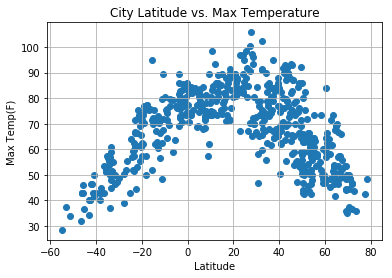

In [21]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature", )
plt.ylabel("Max Temp"+"(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max Temperature vrs Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

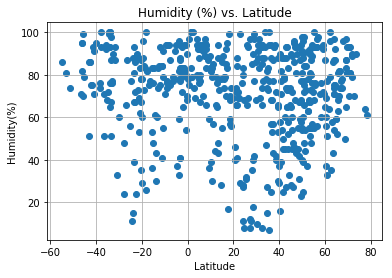

In [22]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity" +"(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Set the y-limits of the current axes to 100 Fahrenheit

ylim=(0, 100)

# Save the figure
plt.savefig("Humidity vs Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

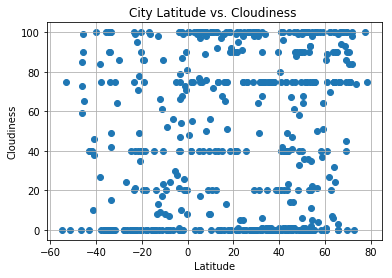

In [23]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Set the y-limits of the current axes to 100 Fahrenheit

xlim=(-80,100)
ylim=(0, 100)


# Save the figure
plt.savefig("Cloudiness vs Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

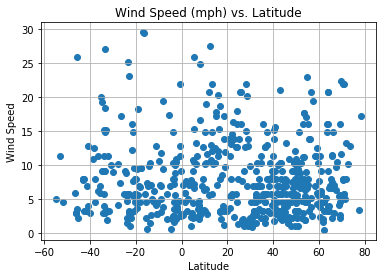

In [24]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind Speed vs Latitude.png")

# Show plot
plt.show()